In [1]:
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [2]:
TEST_IMG_NAME = "pics2/test_image - 18.jpeg"

In [3]:
def display_scaled(pic, scale=1):
    h, w = pic.shape[:2]
    display(Image.fromarray(cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)).resize((int(w * scale), int(h * scale)), Image.LANCZOS))

In [4]:
def display_annotated(pic, quads, scale=1):
    annotated = pic.copy()

    for quad in quads:
        cv2.polylines(
            annotated,
            [quad.astype(np.int32)],
            isClosed=True,
            color=(255, 0, 255),
            thickness=5,
            lineType=cv2.LINE_AA
        )

    display_scaled(annotated, scale)

In [5]:
img_to_process_color = cv2.imread(TEST_IMG_NAME)
img_to_process_gray = cv2.cvtColor(img_to_process_color, cv2.COLOR_BGR2GRAY)

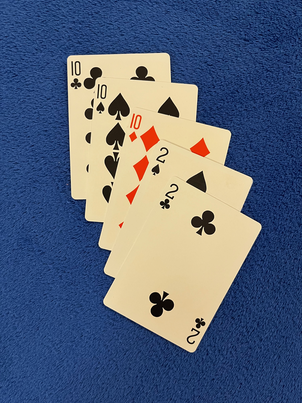

In [6]:
display_scaled(img_to_process_color, 0.1)

In [7]:
_, thresh = cv2.threshold(img_to_process_gray, 150, 255, cv2.THRESH_BINARY)

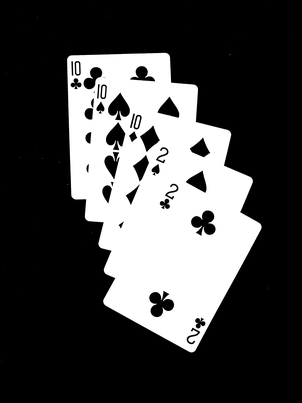

In [8]:
display_scaled(thresh, 0.1)

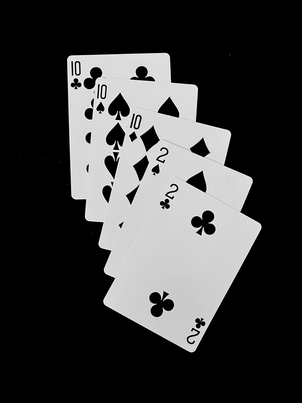

In [9]:
masked = cv2.bitwise_and(img_to_process_gray, img_to_process_gray, mask=thresh)
display_scaled(masked, 0.1)

In [10]:
edges = cv2.Canny(masked, 50, 150)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

3850788.5


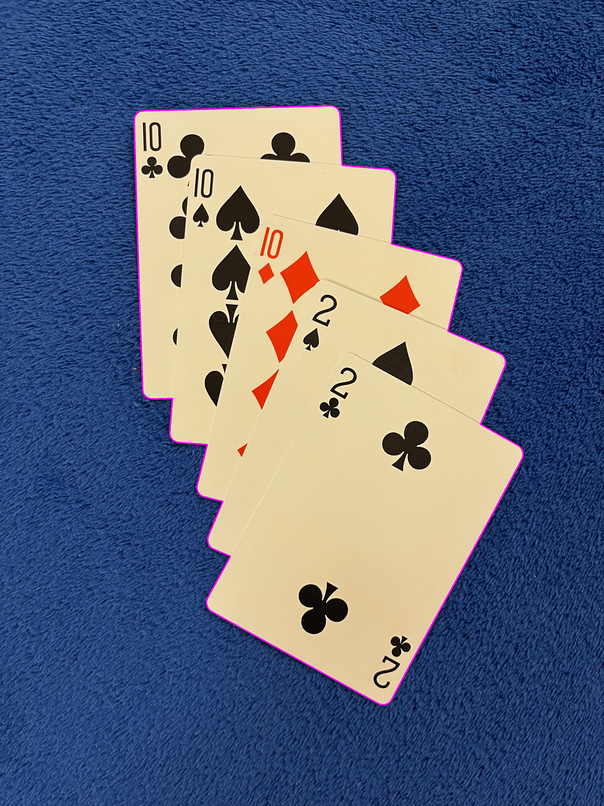

In [11]:
quads = []
contours2 = []
for cntr in contours:
    if cv2.contourArea(cntr) < 10000:
        continue
    print(cv2.contourArea(cntr))
    contours2.append(cntr)
display_annotated(img_to_process_color, contours2, 0.2)